# Title :
Objective / Hypothesis: 
Author: 
Date: 


### Initiation

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [132]:
df_AirBnp_listing = pd.read_csv('listings.csv', delimiter=',')

In [133]:
set(df_AirBnp_listing.columns)

{'access',
 'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'guests_included',
 'has_availability',
 'host_about',
 'host_acceptance_rate',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'house_rules',
 'id',
 'instan

In [134]:
df_AirBnp_listing['security_deposit'].unique()

array(['$3,000.00', nan, '$1,054.00', '$0.00', '$4,215.00', '$1,000.00',
       '$1,500.00', '$900.00', '$3,002.00', '$2,000.00', '$5,000.00',
       '$957.00', '$940.00', '$4,890.00', '$3,688.00', '$1,499.00',
       '$3,161.00', '$2,872.00', '$1,436.00', '$2,500.00', '$1,200.00',
       '$2,634.00', '$30,000.00', '$980.00', '$3,550.00', '$650.00',
       '$8,000.00', '$5,796.00', '$15,000.00', '$6,323.00', '$4,000.00',
       '$10,538.00', '$3,500.00', '$40,000.00', '$7,000.00', '$1,050.00',
       '$10,000.00', '$1,159.00', '$820.00', '$1,600.00', '$5,200.00',
       '$1,265.00', '$6,850.00', '$750.00', '$18,000.00', '$1,250.00',
       '$890.00', '$2,474.00', '$1,991.00', '$5,269.00', '$3,351.00',
       '$850.00', '$1,581.00', '$2,108.00', '$950.00', '$14,000.00',
       '$800.00', '$8,430.00', '$652.00', '$15,635.00', '$1,700.00',
       '$1,350.00', '$2,181.00', '$1,900.00', '$12,000.00', '$885.00',
       '$805.00', '$999.00', '$1,850.00', '$1,800.00', '$20,000.00',
       '$6,

In [135]:
df_AirBnp_listing.info().unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7769 entries, 0 to 7768
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 6.3+ MB


AttributeError: 'NoneType' object has no attribute 'unique'

In [136]:
df_new = df_AirBnp_listing[['room_type', 
                            'accommodates',
                            'bedrooms',
                            'bathrooms',
                            'price',
                            'name',
                            'host_since',
                            'host_response_time',
                            'property_type',
                            'review_scores_value',
                            'square_feet',
                            'cancellation_policy',
                            'host_is_superhost',                            
                            'neighbourhood',
                            'instant_bookable',
                            'extra_people',
                            'number_of_reviews',
                            'security_deposit'
                           ]]

In [137]:
df_new.dtypes

room_type               object
accommodates             int64
bedrooms               float64
bathrooms              float64
price                   object
name                    object
host_since              object
host_response_time      object
property_type           object
review_scores_value    float64
square_feet            float64
cancellation_policy     object
host_is_superhost       object
neighbourhood           object
instant_bookable        object
extra_people            object
number_of_reviews        int64
security_deposit        object
dtype: object

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Starts with EDA

* Convert host_since to date and time
* Retrive year, month, day, day of week and season from the date
* Using get dummies convery categorical values in columns for analysis
* Convert Price from object to numeric


In [140]:

df_new['host_since'] = df_new['host_since'].apply(lambda x:  pd.to_datetime(x))
df_new['Year'] = df_new['host_since'].apply(lambda x: x.year)
df_new['Month'] = df_new['host_since'].apply(lambda x: x.month)
df_new['day'] = df_new['host_since'].apply(lambda x: x.day)
df_new['weekday'] = df_new['host_since'].apply(lambda x: x.weekday())
df_new['weekday_name'] = df_new['host_since'].apply(lambda x: x.day_name())

df_new['square_feet'].fillna(value=0, inplace=True)
df_new['review_scores_value'].fillna(value=0, inplace=True)
df_new['host_response_time'].fillna(value=0, inplace=True)
df_new['host_is_superhost'].fillna(value=0, inplace=True)
df_new['neighbourhood'].fillna(value=0, inplace=True)

df_new['price'] = df_new.price.str.replace('$', '')
df_new['price'] = df_new.price.str.replace(',', '').astype(float)

df_new['extra_people'] = df_new.extra_people.str.replace('$', '')
df_new['extra_people'] = df_new.extra_people.str.replace(',', '').astype(float)

df_new['security_deposit'] = df_new.security_deposit.str.replace('$', '')
df_new['security_deposit'] = df_new.security_deposit.str.replace(',', '').astype(float)





/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [141]:
def superhost(check):
    if check=='t':
        return 1
    elif check=='f':
        return 0
    else:
        return check

df_new['host_is_superhost'] = df_new['host_is_superhost'].apply(lambda x: superhost(x))
df_new['instant_bookable'] = df_new['instant_bookable'].apply(lambda x: superhost(x))


/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [142]:
def season(mnth):
    if mnth in (12, 1, 2):
        return 'Winter'
    elif mnth in (3,4,5):
        return 'Spring'
    elif mnth in (6,7,8):
        return 'Summer'
    else:
        return 'Autumn'

df_new['Season'] = df_new['Month'].apply(lambda x: season(x))

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [143]:
df_new.dtypes

room_type                      object
accommodates                    int64
bedrooms                      float64
bathrooms                     float64
price                         float64
name                           object
host_since             datetime64[ns]
host_response_time             object
property_type                  object
review_scores_value           float64
square_feet                   float64
cancellation_policy            object
host_is_superhost               int64
neighbourhood                  object
instant_bookable                int64
extra_people                  float64
number_of_reviews               int64
security_deposit              float64
Year                          float64
Month                         float64
day                           float64
weekday                       float64
weekday_name                   object
Season                         object
dtype: object

In [144]:
df_new.head(1)

,room_type,accommodates,bedrooms,bathrooms,price,name,host_since,host_response_time,property_type,review_scores_value,...,instant_bookable,extra_people,number_of_reviews,security_deposit,Year,Month,day,weekday,weekday_name,Season
0,Entire home/apt,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,within a few hours,House,0.0,...,0,500.0,0,3000.0,2011.0,6.0,26.0,6.0,Sunday,Summer


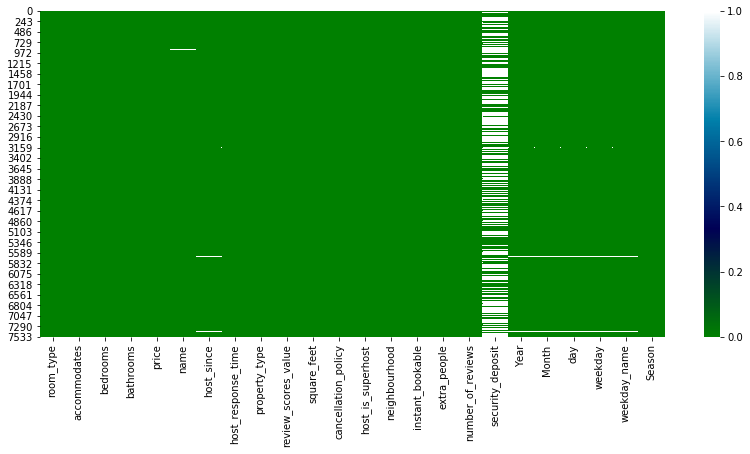

In [145]:
plt.figure(figsize=(14,6))
sns.heatmap(df_new.isna(), cmap='ocean')

In [146]:
df_new.dropna(inplace=True)

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


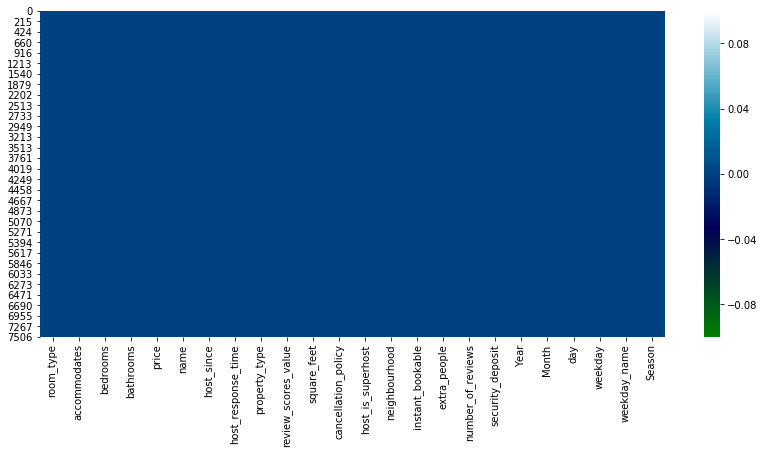

In [147]:
plt.figure(figsize=(14,6))
sns.heatmap(df_new.isna(), cmap='ocean')

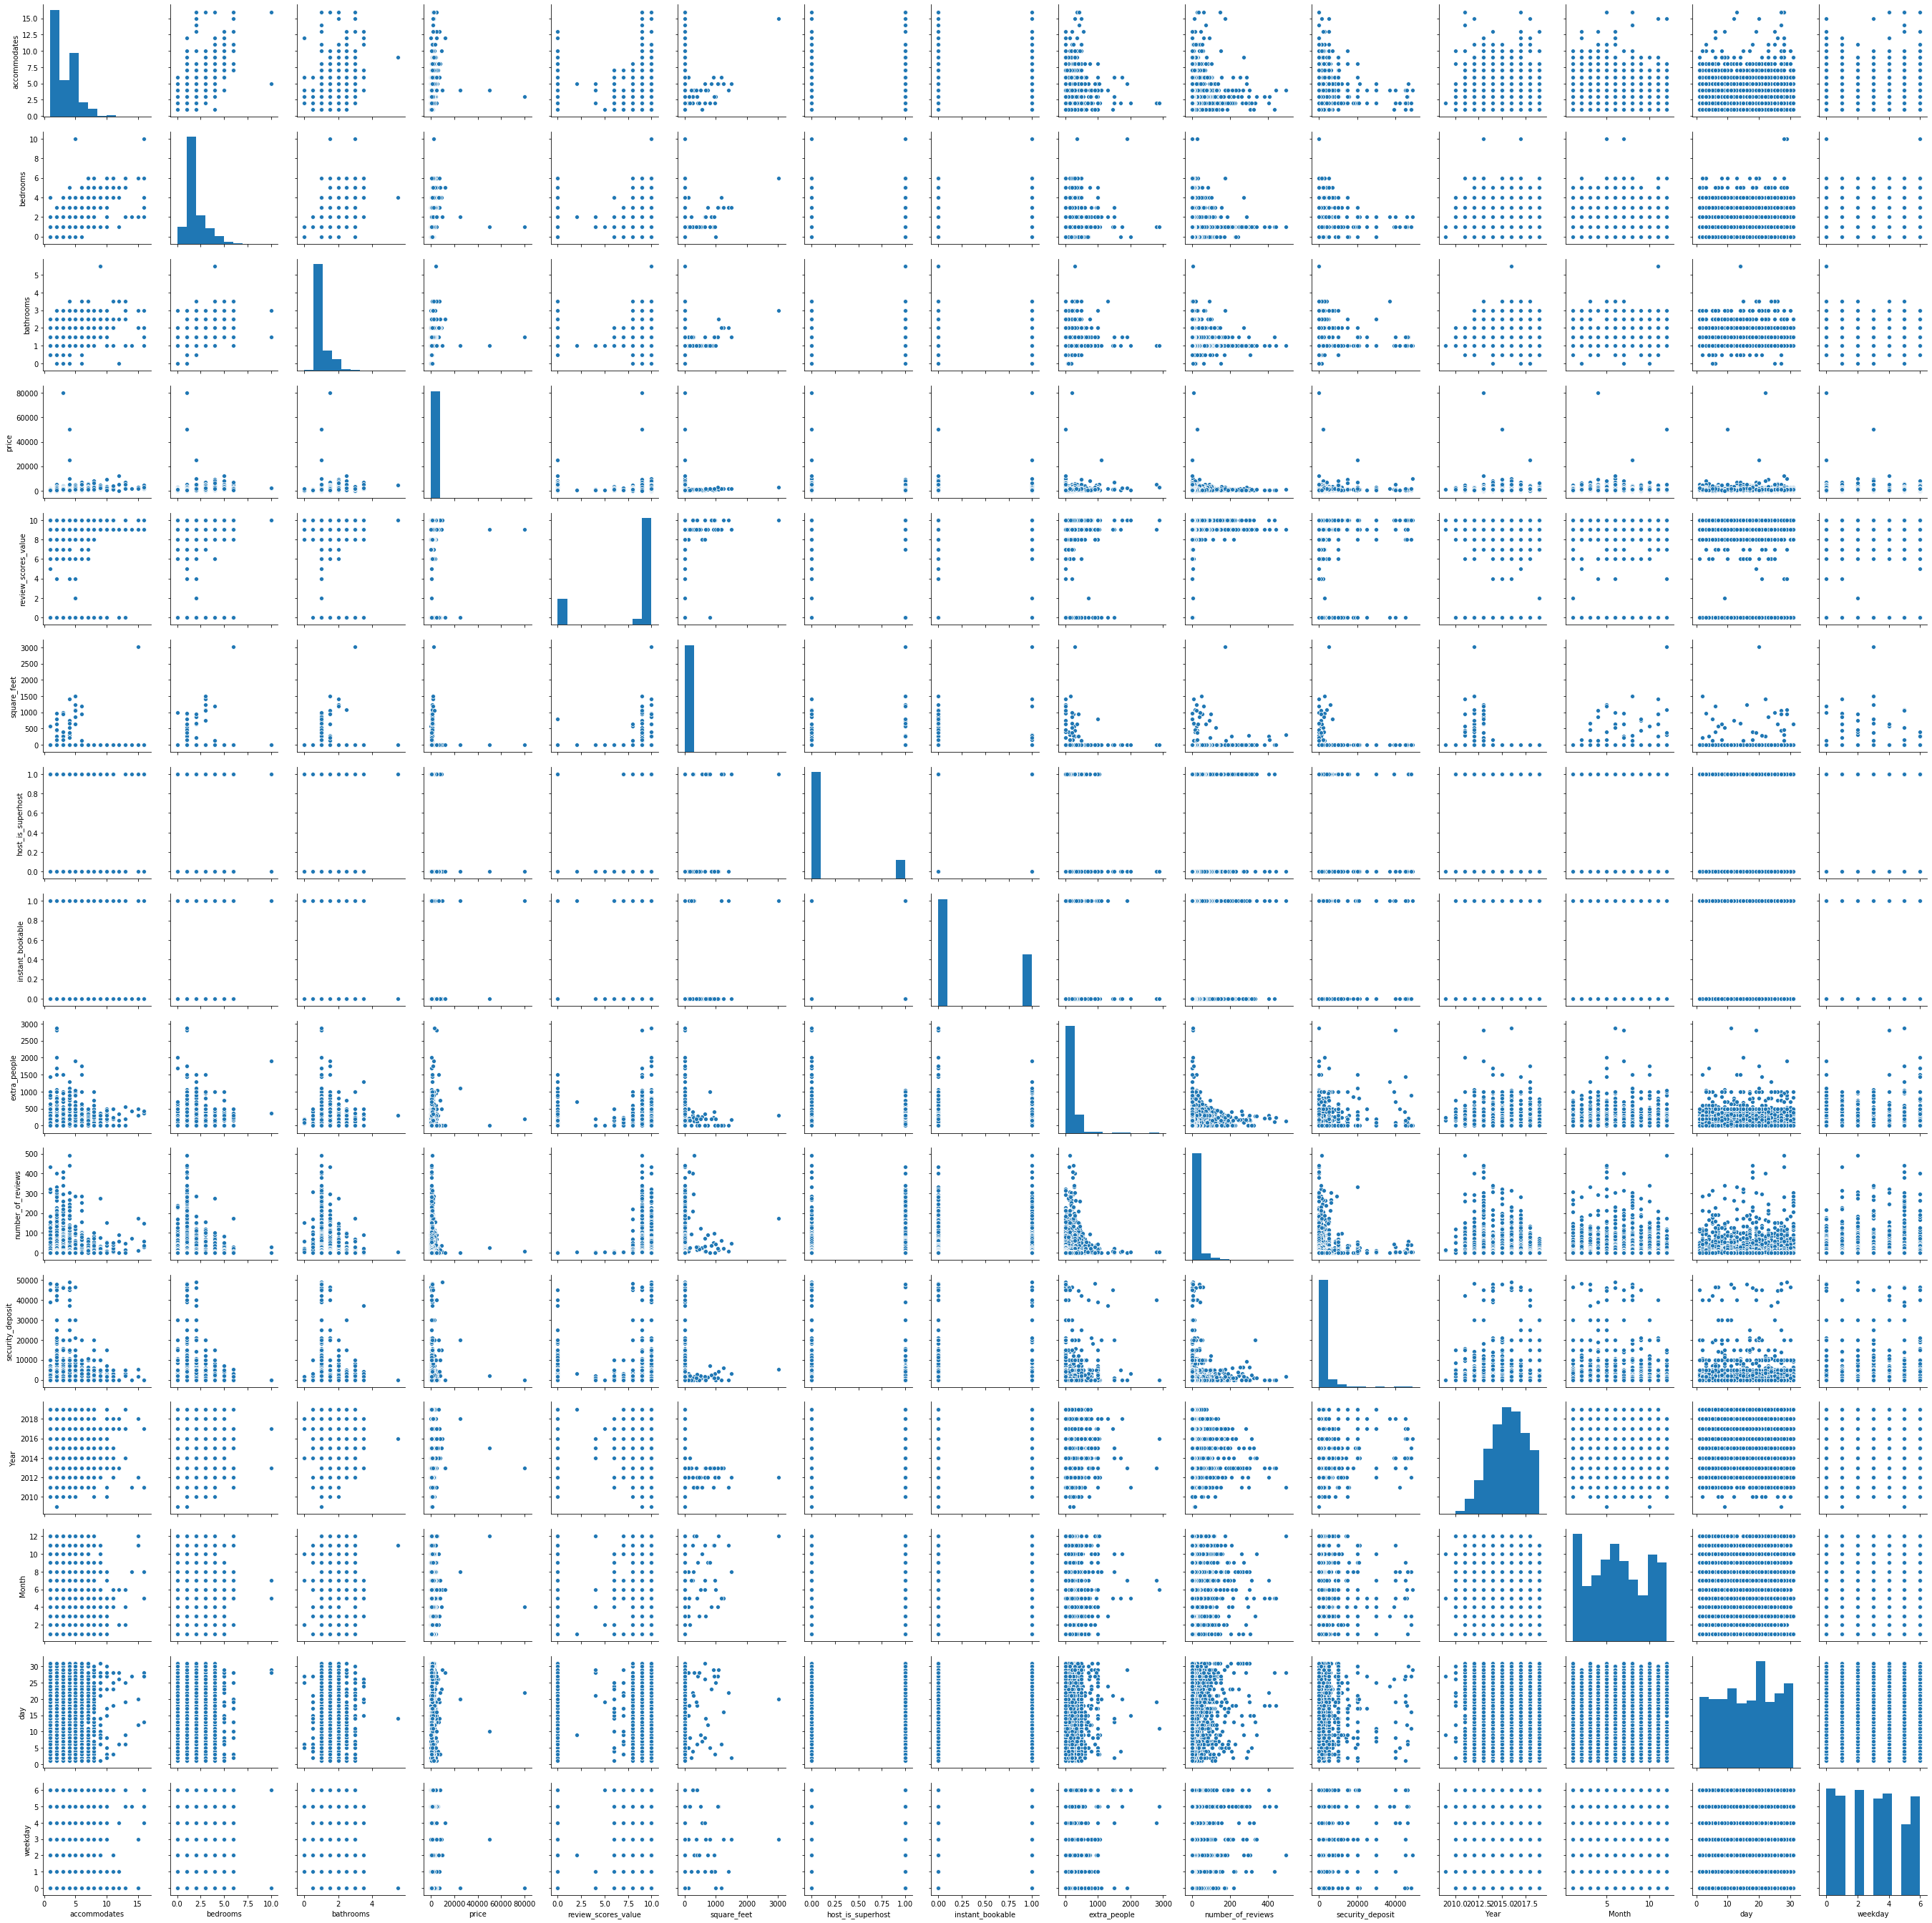

In [148]:
sns.pairplot(df_new)

In [149]:
df_new['price'].describe()

count     3510.000000
mean      1129.980342
std       1796.348386
min         96.000000
25%        651.000000
50%        900.000000
75%       1292.000000
max      80001.000000
Name: price, dtype: float64

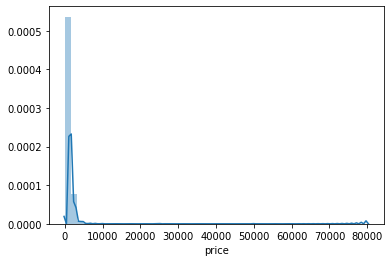

In [150]:
sns.distplot(df_new['price'])

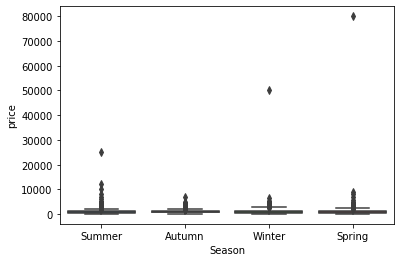

In [151]:
sns.boxplot(x='Season', y ='price', data=df_new)

### Above boxplot stats high variation, it could also be a case of bad data quality
### need to remove the values above max value (mean + STD)

In [152]:
a = np.floor(df_new['price'].mean() + df_new['price'].std())
a

2926.0

In [153]:
df_new[df_new['price'] > np.floor(df_new['price'].mean() + df_new['price'].std())]['price'].count()

103

In [154]:
#df_new.drop(df_new[df_new['price']>np.floor(df_new['price'].mean() + df_new['price'].std())].index, inplace=True)

df_new.drop(df_new[df_new['price']>a].index, inplace=True)

/Users/akbaralishaikh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### we should again check mean and std dev and box plt

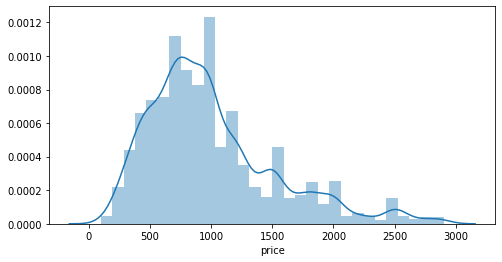

In [155]:
plt.figure(figsize=(8,4))
sns.distplot(df_new['price'], bins=30)

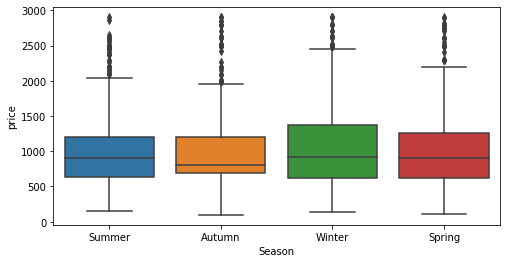

In [156]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Season', y ='price', data=df_new)

In [157]:
df_new['room_type'].value_counts()

Entire home/apt    2813
Private room        540
Hotel room           30
Shared room          24
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room Type ~ Count')

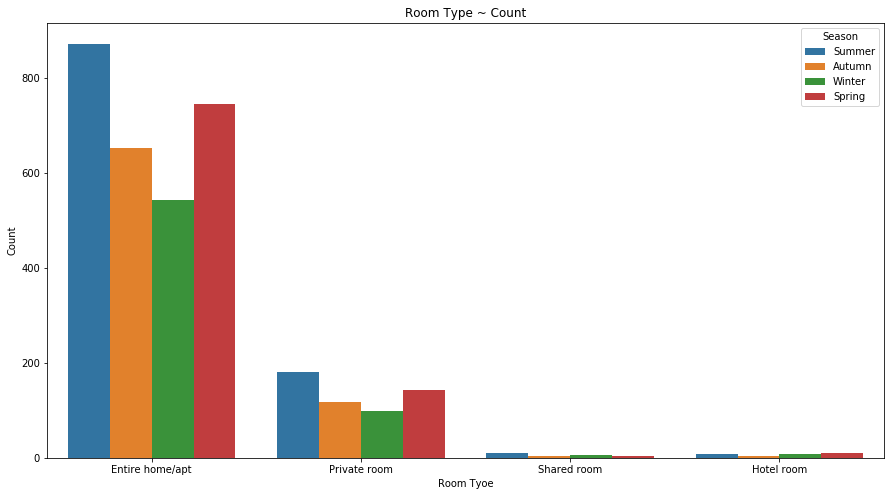

In [158]:
plt.figure(figsize=(15,8))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.countplot(x='room_type', data=df_new, hue='Season')
plt.xlabel("Room Tyoe")
plt.ylabel("Count")
plt.title("Room Type ~ Count")

Text(0.5, 1.0, 'Season ~ Room Type')

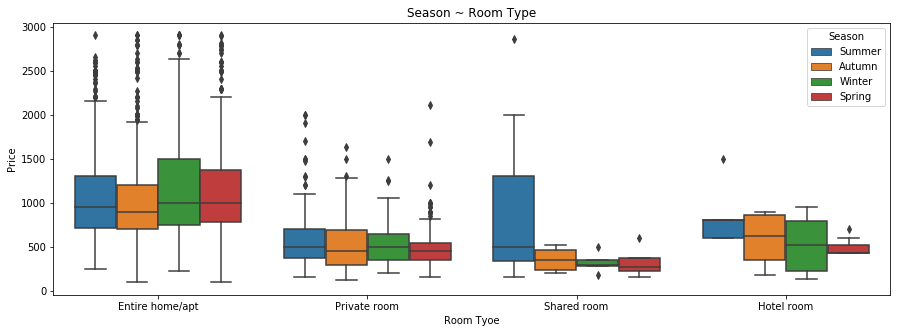

In [159]:
plt.figure(figsize=(15,5))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.boxplot(x='room_type', y ='price', data=df_new, hue='Season')
plt.xlabel("Room Tyoe")
plt.ylabel("Price")
plt.title("Season ~ Room Type")

Text(0.5, 1.0, 'Square Feet ~ Price ~ Season')

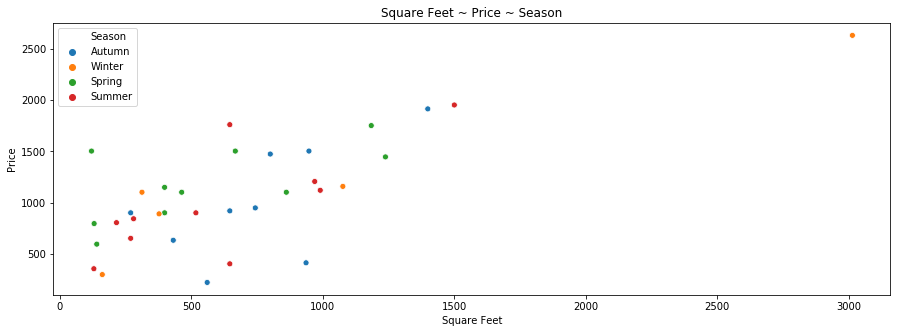

In [160]:
plt.figure(figsize=(15,5))
#sns.boxplot(x='Season', y ='price', data=df_new, hue='room_type')
sns.scatterplot(x='square_feet', y ='price', data=df_new[df_new['square_feet']>0], hue='Season')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet ~ Price ~ Season")

Text(0.5, 1, 'Square Feet ~ Price ~ Season')

<Figure size 1080x1080 with 0 Axes>

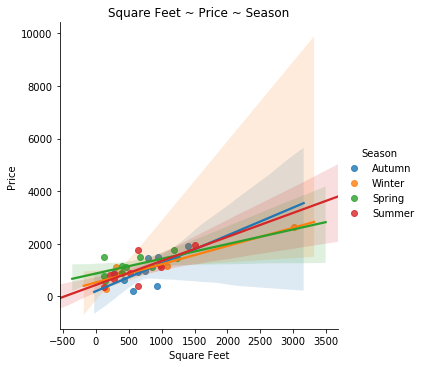

In [161]:
plt.figure(figsize=(15,15))
sns.lmplot(x='square_feet', y ='price', data=df_new[df_new['square_feet']>0], hue='Season')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Square Feet ~ Price ~ Season")

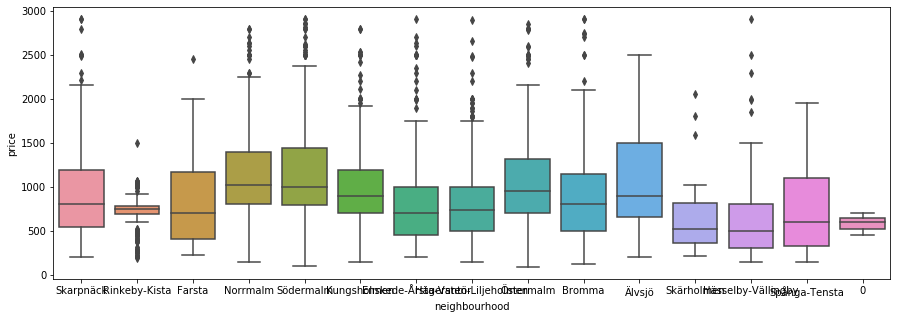

In [162]:
plt.figure(figsize=(15,5))
sns.boxplot(x='neighbourhood', y ='price', data=df_new)

Higher outlier in data observed for Room Type (Entire Home / apt and Private room) as compared to shared room and hotel room. Average price of Entire Home / apt and Private room in all season is very close, weras in regards to Shared room and Hotel room, we can observe season has an impact of proce

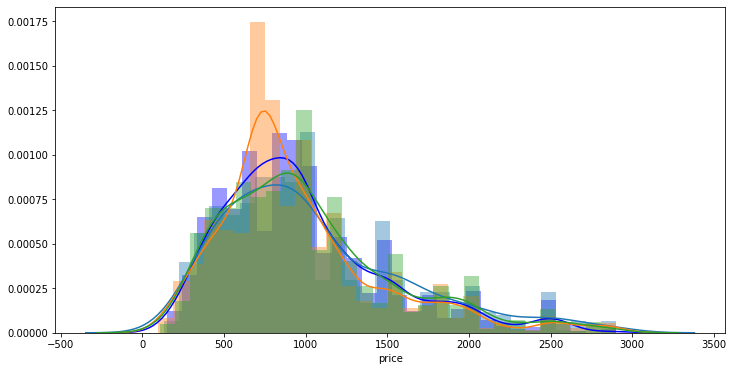

In [163]:

Summer = df_new[df_new['Season']=='Summer']['price'] 
Winter = df_new[df_new['Season']=='Winter']['price'] 
Autumn = df_new[df_new['Season']=='Autumn']['price'] 
Spring = df_new[df_new['Season']=='Spring']['price'] 

plt.figure(figsize=(12,6))
sns.distplot(Summer, bins=30, color='blue')
sns.distplot(Winter, bins=30)
sns.distplot(Autumn, bins=30)
sns.distplot(Spring, bins=30)

In [164]:
df_new.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'name',
       'host_since', 'host_response_time', 'property_type',
       'review_scores_value', 'square_feet', 'cancellation_policy',
       'host_is_superhost', 'neighbourhood', 'instant_bookable',
       'extra_people', 'number_of_reviews', 'security_deposit', 'Year',
       'Month', 'day', 'weekday', 'weekday_name', 'Season'],
      dtype='object')

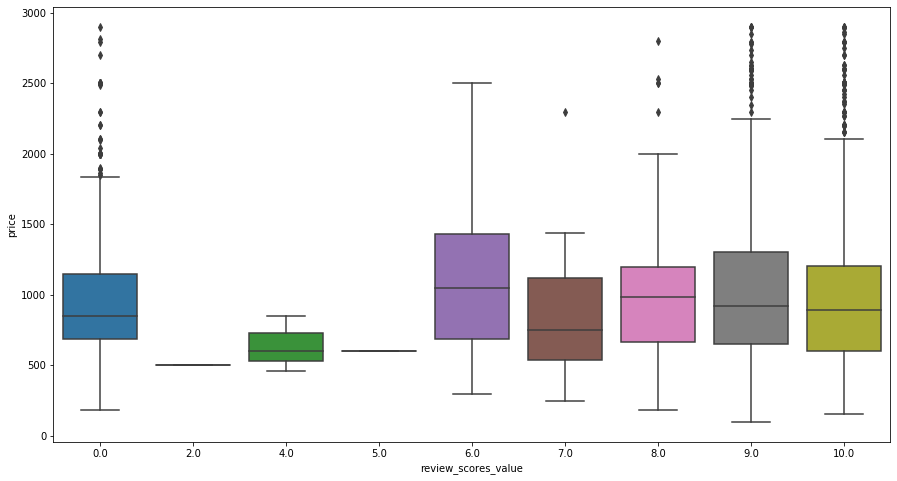

In [165]:
plt.figure(figsize=(15,8))
sns.boxplot(x='review_scores_value', y ='price', data=df_new)

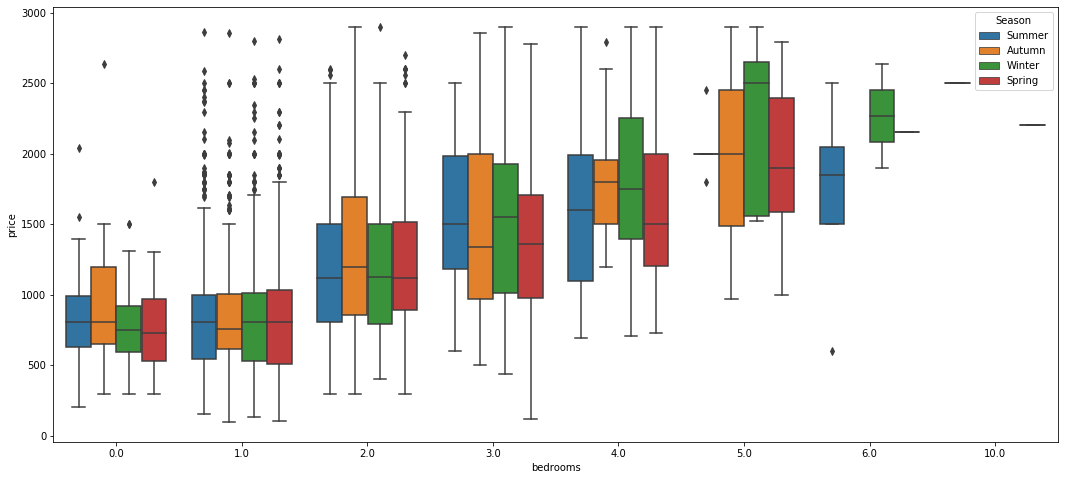

In [166]:
plt.figure(figsize=(18,8))
sns.boxplot(x='bedrooms', y ='price', data=df_new, hue='Season')

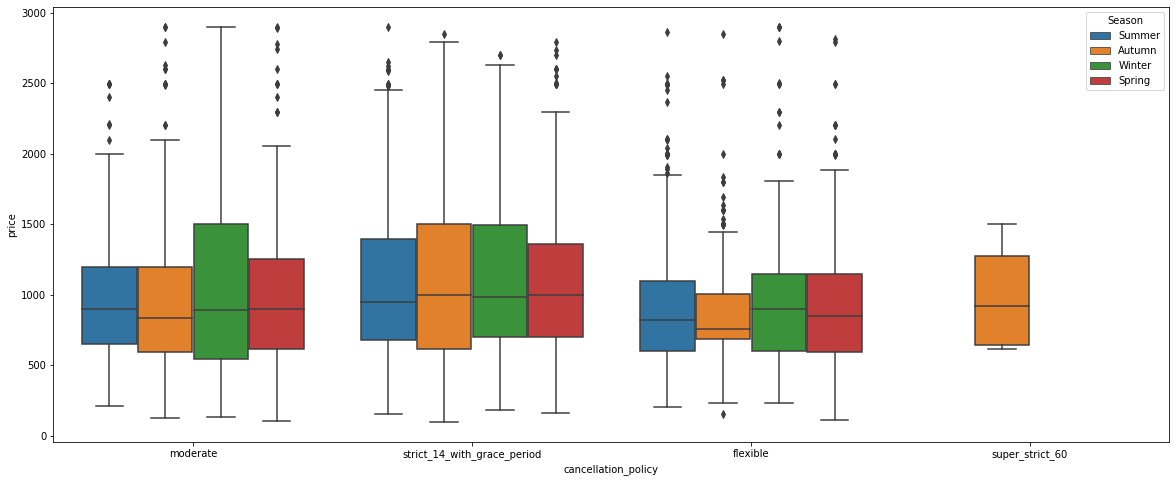

In [167]:
plt.figure(figsize=(20,8))
sns.boxplot(x='cancellation_policy', y ='price', data=df_new, hue='Season')

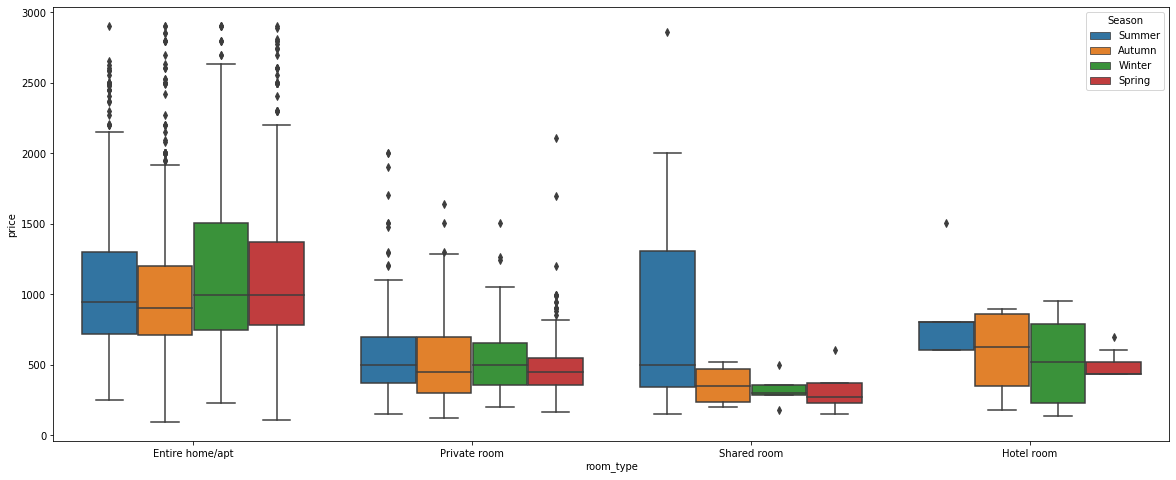

In [168]:
plt.figure(figsize=(20,8))
sns.boxplot(x='room_type', y ='price', data=df_new, hue='Season')

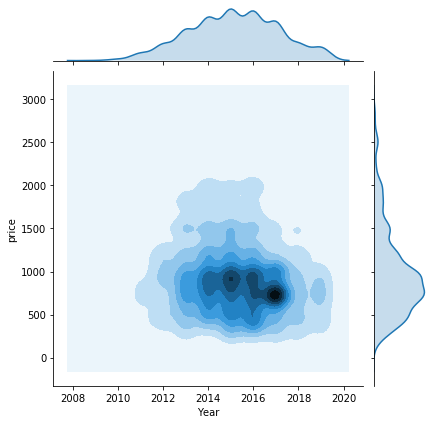

In [169]:
sns.jointplot(x='Year', y ='price', data=df_new, kind='kde')

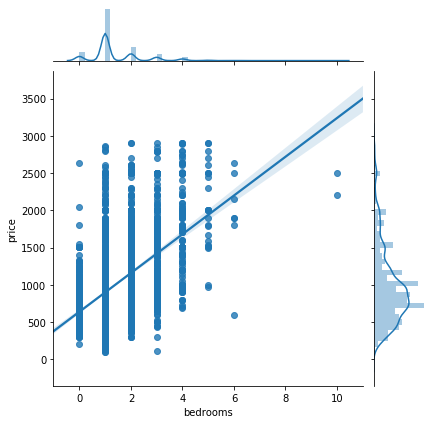

In [170]:
sns.jointplot(x='bedrooms', y ='price', data=df_new, kind='reg')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

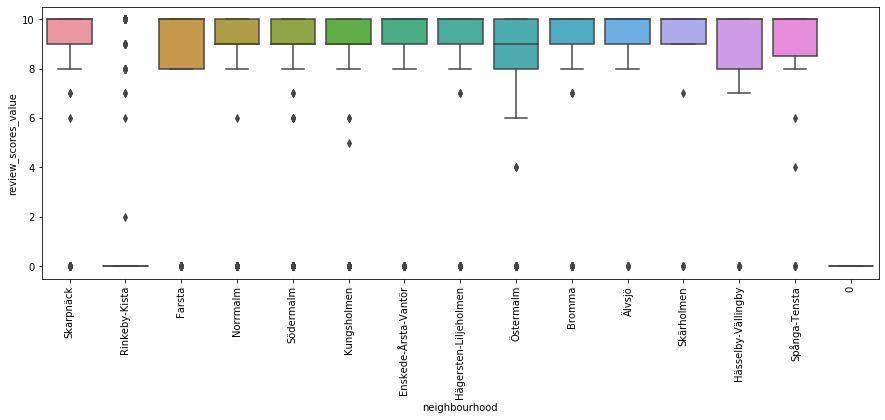

In [171]:
plt.figure(figsize=(15,5))
sns.boxplot(x='neighbourhood', y ='review_scores_value', data=df_new)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

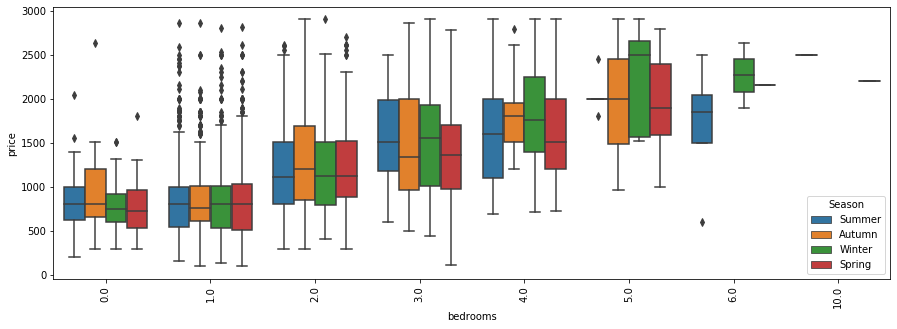

In [172]:
plt.figure(figsize=(15,5))
sns.boxplot(x='bedrooms', y ='price', data=df_new, hue='Season')
plt.xticks(rotation=90)

In [173]:
df_new.head(1)

,room_type,accommodates,bedrooms,bathrooms,price,name,host_since,host_response_time,property_type,review_scores_value,...,instant_bookable,extra_people,number_of_reviews,security_deposit,Year,Month,day,weekday,weekday_name,Season
0,Entire home/apt,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,within a few hours,House,0.0,...,0,500.0,0,3000.0,2011.0,6.0,26.0,6.0,Sunday,Summer


In [174]:
room_type = pd.get_dummies(df_new['room_type'], dummy_na=False, drop_first=True)
host_response_time = pd.get_dummies(df_new['host_response_time'], dummy_na=False, drop_first=True)
property_type = pd.get_dummies(df_new['property_type'], dummy_na=False, drop_first=True)
cancellation_policy = pd.get_dummies(df_new['cancellation_policy'], dummy_na=False, drop_first=True)
neighbourhood = pd.get_dummies(df_new['neighbourhood'], dummy_na=False, drop_first=True)
season = pd.get_dummies(df_new['Season'], dummy_na=False, drop_first=True)

In [175]:
df_new.columns

Index(['room_type', 'accommodates', 'bedrooms', 'bathrooms', 'price', 'name',
       'host_since', 'host_response_time', 'property_type',
       'review_scores_value', 'square_feet', 'cancellation_policy',
       'host_is_superhost', 'neighbourhood', 'instant_bookable',
       'extra_people', 'number_of_reviews', 'security_deposit', 'Year',
       'Month', 'day', 'weekday', 'weekday_name', 'Season'],
      dtype='object')

In [176]:
df_new.corr()

,accommodates,bedrooms,bathrooms,price,review_scores_value,square_feet,host_is_superhost,instant_bookable,extra_people,number_of_reviews,security_deposit,Year,Month,day,weekday
accommodates,1.000000,0.710520,0.440042,0.516267,0.065989,0.092426,-0.013945,-0.024006,0.105584,0.003256,0.032095,-0.042939,-0.095215,-0.015463,0.011487
bedrooms,0.710520,1.000000,0.559138,0.488954,0.039019,0.083045,-0.054642,-0.045849,0.073559,-0.070240,0.043053,-0.069685,-0.114608,-0.040489,0.024904
bathrooms,0.440042,0.559138,1.000000,0.296330,0.040340,0.086434,0.010859,-0.006709,0.065987,-0.034594,0.022551,-0.032623,-0.069801,-0.028563,-0.006987
price,0.516267,0.488954,0.296330,1.000000,0.023986,0.058828,-0.027597,-0.093688,0.139801,-0.044809,0.099393,-0.097518,-0.051770,-0.013344,-0.014492
review_scores_value,0.065989,0.039019,0.040340,0.023986,1.000000,0.028544,0.187790,-0.148931,0.121248,0.220885,-0.022906,-0.144619,-0.132515,-0.043705,-0.066619
square_feet,0.092426,0.083045,0.086434,0.058828,0.028544,1.000000,0.065992,-0.008029,0.022511,0.108783,0.008204,-0.119252,0.048810,0.008989,-0.016432
host_is_superhost,-0.013945,-0.054642,0.010859,-0.027597,0.187790,0.065992,1.000000,0.051448,0.078721,0.358067,-0.009137,-0.100131,-0.010061,0.045525,0.041695
instant_bookable,-0.024006,-0.045849,-0.006709,-0.093688,-0.148931,-0.008029,0.051448,1.000000,-0.043931,0.064092,-0.082348,0.291209,0.113273,0.029473,0.060801
extra_people,0.105584,0.073559,0.065987,0.139801,0.121248,0.022511,0.078721,-0.043931,1.000000,0.087852,0.116355,-0.078177,-0.025218,0.012874,0.004838
number_of_reviews,0.003256,-0.070240,-0.034594,-0.044809,0.220885,0.108783,0.358067,0.064092,0.087852,1.000000,-0.015734,-0.138822,-0.018174,0.052431,0.032582


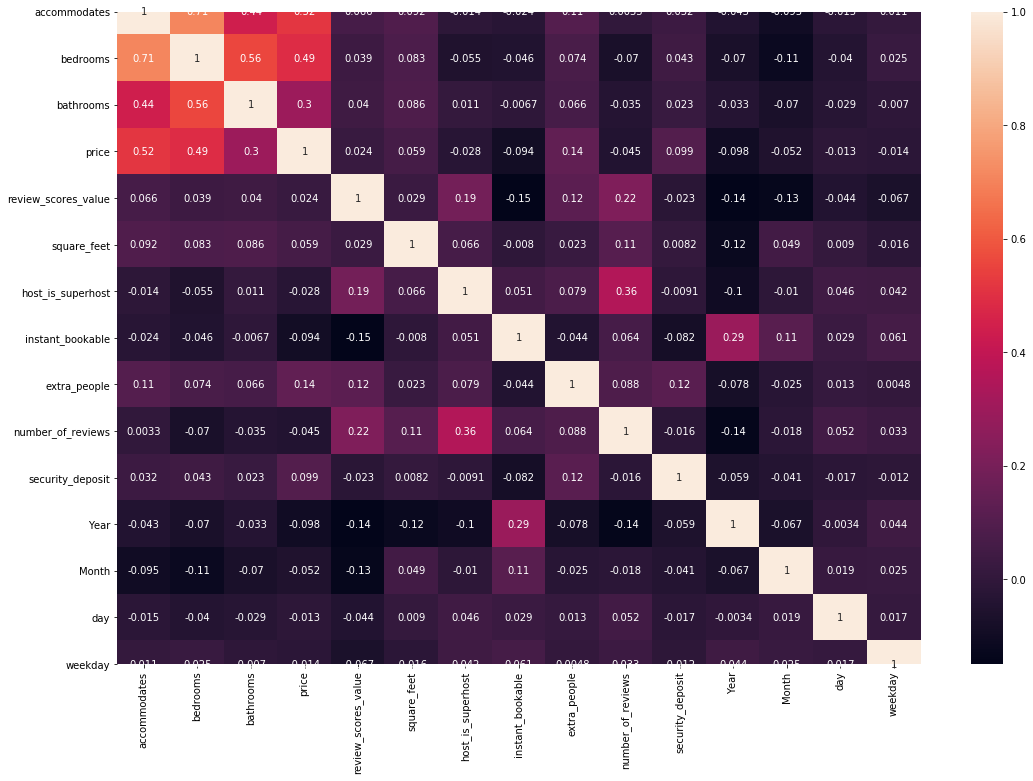

In [177]:
plt.figure(figsize=(18,12))
sns.heatmap(df_new.corr(), annot=True)

In [178]:
df_new = pd.concat([df_new, room_type, host_response_time, 
                    property_type, cancellation_policy, neighbourhood, season],axis=1)

In [179]:
df_new.drop(['room_type', 'host_response_time', 
        'property_type', 'cancellation_policy','neighbourhood','Season'],axis=1,inplace=True) #neighbourhood

In [180]:
df_new.head(1)

,accommodates,bedrooms,bathrooms,price,name,host_since,review_scores_value,square_feet,host_is_superhost,instant_bookable,...,Rinkeby-Kista,Skarpnäck,Skärholmen,Spånga-Tensta,Södermalm,Älvsjö,Östermalm,Spring,Summer,Winter
0,3,2.0,1.0,1197.0,"Stockholm, new spacoius villa",2011-06-26,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Modeling

In [181]:
# Linear model regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [184]:
df_new.columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'price', 'name', 'host_since',
       'review_scores_value', 'square_feet', 'host_is_superhost',
       'instant_bookable', 'extra_people', 'number_of_reviews',
       'security_deposit', 'Year', 'Month', 'day', 'weekday', 'weekday_name',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Condominium',
       'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat',
       'Loft', 'Nature lodge', 'Serviced apartment', 'Tiny house', 'Townhouse',
       'Treehouse', 'Villa', 'moderate', 'strict_14_with_grace_period',
       'super_strict_60', 'Bromma', 'Enskede-Årsta-Vantör', 'Farsta',
       'Hägersten-Liljeholmen', 'Hässelby-Vällingby', 'Kungsholmen',
       'Norrmalm', 'Rinkeby-Kista', 'Skarpnäck', 'Skärholmen', 'Spånga-Tensta',
       'Södermalm', 'Älvsjö', 'Österm

In [192]:
X = df_new[['accommodates', 'bedrooms', 'bathrooms', 
       'review_scores_value', 'square_feet', 'host_is_superhost',
       'instant_bookable', 'extra_people', 'number_of_reviews',
       'security_deposit', 'Year', 'Month', 'day', 'weekday',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Condominium',
       'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat',
       'Loft', 'Nature lodge', 'Serviced apartment', 'Tiny house', 'Townhouse',
       'Treehouse', 'Villa', 'moderate', 'strict_14_with_grace_period',
       'super_strict_60', 'Bromma', 'Enskede-Årsta-Vantör', 'Farsta',
       'Hägersten-Liljeholmen', 'Hässelby-Vällingby', 'Kungsholmen',
       'Norrmalm', 'Rinkeby-Kista', 'Skarpnäck', 'Skärholmen', 'Spånga-Tensta',
       'Södermalm', 'Älvsjö', 'Östermalm', 'Spring', 'Summer', 'Winter']]

y = df_new['price']

In [186]:
'''
X = df_new[['accommodates', 'bedrooms', 'bathrooms', 
       'review_scores_value', 'square_feet', 'host_is_superhost',
       'instant_bookable', 'Year', 'Month', 'day', 'weekday',
       'Hotel room', 'Private room', 'Shared room', 'a few days or more',
       'within a day', 'within a few hours', 'within an hour', 'Apartment',
       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Camper/RV',
       'Condominium', 'Cottage', 'Earth house', 'Farm stay', 'Guest suite',
       'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat', 'In-law', 'Loft',
       'Nature lodge', 'Other', 'Serviced apartment', 'Tiny house',
       'Townhouse', 'Treehouse', 'Villa', 'moderate',
       'strict_14_with_grace_period', 'super_strict_60', 'Bromma',
       'Enskede-Årsta-Vantör', 'Farsta', 'Hägersten-Liljeholmen',
       'Hässelby-Vällingby', 'Kungsholmen', 'Norrmalm', 'Rinkeby-Kista',
       'Skarpnäck', 'Skärholmen', 'Spånga-Tensta', 'Södermalm', 'Älvsjö',
       'Östermalm', 'Spring', 'Summer', 'Winter', 'extra_people', 'number_of_reviews',
           'security_deposit']]

y = df_new['price']
'''

"\nX = df_new[['accommodates', 'bedrooms', 'bathrooms', \n       'review_scores_value', 'square_feet', 'host_is_superhost',\n       'instant_bookable', 'Year', 'Month', 'day', 'weekday',\n       'Hotel room', 'Private room', 'Shared room', 'a few days or more',\n       'within a day', 'within a few hours', 'within an hour', 'Apartment',\n       'Bed and breakfast', 'Boat', 'Boutique hotel', 'Cabin', 'Camper/RV',\n       'Condominium', 'Cottage', 'Earth house', 'Farm stay', 'Guest suite',\n       'Guesthouse', 'Hostel', 'Hotel', 'House', 'Houseboat', 'In-law', 'Loft',\n       'Nature lodge', 'Other', 'Serviced apartment', 'Tiny house',\n       'Townhouse', 'Treehouse', 'Villa', 'moderate',\n       'strict_14_with_grace_period', 'super_strict_60', 'Bromma',\n       'Enskede-Årsta-Vantör', 'Farsta', 'Hägersten-Liljeholmen',\n       'Hässelby-Vällingby', 'Kungsholmen', 'Norrmalm', 'Rinkeby-Kista',\n       'Skarpnäck', 'Skärholmen', 'Spånga-Tensta', 'Södermalm', 'Älvsjö',\n       'Östermalm

In [193]:
X.head(3)

,accommodates,bedrooms,bathrooms,review_scores_value,square_feet,host_is_superhost,instant_bookable,extra_people,number_of_reviews,security_deposit,...,Rinkeby-Kista,Skarpnäck,Skärholmen,Spånga-Tensta,Södermalm,Älvsjö,Östermalm,Spring,Summer,Winter
0,3,2.0,1.0,0.0,0.0,0,0,500.0,0,3000.0,...,0,1,0,0,0,0,0,0,1,0
8,1,1.0,1.0,8.0,560.0,1,0,263.0,24,1054.0,...,1,0,0,0,0,0,0,0,0,0
9,4,3.0,2.0,10.0,1399.0,0,1,0.0,8,0.0,...,0,1,0,0,0,0,0,0,0,0


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [195]:
lm = LinearRegression()

In [196]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
print(lm.coef_)

[ 6.65242382e+01  1.36791048e+02  1.31624610e+02 -3.83007122e+00
 -4.07740203e-02  3.30886345e+01 -2.34927017e+01  1.34463775e-01
 -5.28511529e-01  6.06488225e-03 -2.75173607e+00 -2.76107390e+00
  1.10497704e+00 -2.29818502e+00  1.25801645e+02 -3.30100275e+02
 -3.94592343e+02  1.21372949e+02  9.33815198e+01  9.21273574e+01
  6.39834358e+01 -7.46296317e+02 -7.54149698e+02 -1.04145533e+03
 -9.50271582e+02 -1.58796630e+02 -6.79540036e+02 -7.83822956e+02
 -6.64646022e+02 -1.73869673e+03 -1.23054881e+03 -5.53798307e+02
 -1.03953551e+03 -6.27606088e+02 -1.12775471e+03 -9.08190799e+02
 -9.05680156e+02 -7.47121344e+02 -8.22330616e+02 -6.72337741e+02
  6.11030522e+00  3.30219751e+01  4.25926335e+01 -1.36094505e+02
 -4.83525164e+01 -1.62794557e+02 -3.99161669e+01 -2.15375337e+02
  2.12612422e+02  3.62659514e+02 -3.24397974e+01 -3.76094140e+00
 -2.07798990e+02 -3.09709335e+02  3.13342812e+02 -5.20139558e+01
  3.19641354e+02 -5.41614285e+01 -4.31575506e+01 -3.94259879e+01]


In [198]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [199]:
cdf

,Coeff
accommodates,66.524238
bedrooms,136.791048
bathrooms,131.624610
review_scores_value,-3.830071
square_feet,-0.040774
host_is_superhost,33.088635
instant_bookable,-23.492702
extra_people,0.134464
number_of_reviews,-0.528512
security_deposit,0.006065


In [200]:
prediction = lm.predict(X_test)

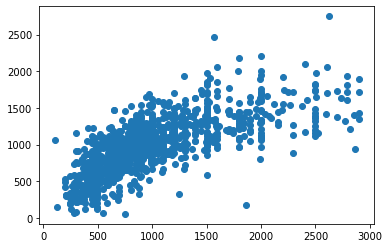

In [201]:
plt.scatter(y_test, prediction)

In [202]:
from sklearn import metrics

In [203]:
metrics.mean_absolute_error(y_test, prediction)

273.6797668635489

In [204]:
metrics.mean_squared_error(y_test, prediction)

144942.19454426444

In [205]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

380.7127454449935

In [206]:
metrics.explained_variance_score(y_test, prediction)

0.5020614326417829

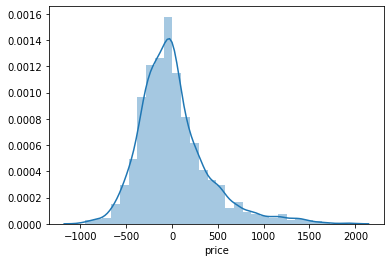

In [207]:
sns.distplot(y_test-prediction, bins=30)

In [208]:
cdf

,Coeff
accommodates,66.524238
bedrooms,136.791048
bathrooms,131.624610
review_scores_value,-3.830071
square_feet,-0.040774
host_is_superhost,33.088635
instant_bookable,-23.492702
extra_people,0.134464
number_of_reviews,-0.528512
security_deposit,0.006065
